#Regresión lineal con Iris data

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/Tec/Tec_2023_AD/MA2003B_AD_2023/MA2003B_AD_2023/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.drop('Id',axis=1,inplace=True)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
dummies=pd.get_dummies(df['Species'],prefix='Species')

In [ ]:
dummies

In [ ]:
df=pd.concat([df,dummies],axis=1)

In [ ]:
df

In [ ]:
df.columns

In [ ]:
df.rename(columns={'Species_Iris-setosa':'Species_setosa'},inplace=True)

In [ ]:
df.rename(columns={'Species_Iris-versicolor':'Species_versicolor'},inplace=True)

In [ ]:
df.rename(columns={'Species_Iris-virginica':'Species_virginica'},inplace=True)

In [ ]:
correlacion=df.corr()

In [ ]:
alta_corr=np.where((correlacion>0.95)&(correlacion<1))

In [ ]:
correlacion

In [ ]:
alta_corr

In [ ]:
baja_corr=np.where((correlacion<-0.95)&(correlacion>-1))

In [ ]:
baja_corr

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
df.drop('Species',axis=1,inplace=True)

In [ ]:
df_estandar=scaler.fit_transform(df)

In [ ]:
df_estandar

array([[-0.90068117,  1.03205722, -1.3412724 , ...,  1.41421356,
        -0.70710678, -0.70710678],
       [-1.14301691, -0.1249576 , -1.3412724 , ...,  1.41421356,
        -0.70710678, -0.70710678],
       [-1.38535265,  0.33784833, -1.39813811, ...,  1.41421356,
        -0.70710678, -0.70710678],
       ...,
       [ 0.79566902, -0.1249576 ,  0.81962435, ..., -0.70710678,
        -0.70710678,  1.41421356],
       [ 0.4321654 ,  0.80065426,  0.93335575, ..., -0.70710678,
        -0.70710678,  1.41421356],
       [ 0.06866179, -0.1249576 ,  0.76275864, ..., -0.70710678,
        -0.70710678,  1.41421356]])

In [ ]:
df_estandar=pd.DataFrame(df_estandar,columns=df.columns)

In [ ]:
df_estandar

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_setosa,Species_versicolor,Species_virginica
0,-0.900681,1.032057,-1.341272,-1.312977,1.414214,-0.707107,-0.707107
1,-1.143017,-0.124958,-1.341272,-1.312977,1.414214,-0.707107,-0.707107
2,-1.385353,0.337848,-1.398138,-1.312977,1.414214,-0.707107,-0.707107
3,-1.506521,0.106445,-1.284407,-1.312977,1.414214,-0.707107,-0.707107
4,-1.021849,1.263460,-1.341272,-1.312977,1.414214,-0.707107,-0.707107
...,...,...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,-0.707107,-0.707107,1.414214
146,0.553333,-1.281972,0.705893,0.922064,-0.707107,-0.707107,1.414214
147,0.795669,-0.124958,0.819624,1.053537,-0.707107,-0.707107,1.414214
148,0.432165,0.800654,0.933356,1.447956,-0.707107,-0.707107,1.414214


In [ ]:
from sklearn.model_selection import train_test_split
entrenamiento, prueba=train_test_split(df_estandar,test_size=0.20,random_state=42)

In [ ]:
entrenamiento

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_setosa,Species_versicolor,Species_virginica
22,-1.506521,1.263460,-1.568735,-1.312977,1.414214,-0.707107,-0.707107
15,-0.173674,3.114684,-1.284407,-1.050031,1.414214,-0.707107,-0.707107
65,1.038005,0.106445,0.364699,0.264699,-0.707107,1.414214,-0.707107
11,-1.264185,0.800654,-1.227541,-1.312977,1.414214,-0.707107,-0.707107
42,-1.748856,0.337848,-1.398138,-1.312977,1.414214,-0.707107,-0.707107
...,...,...,...,...,...,...,...
71,0.310998,-0.587764,0.137236,0.133226,-0.707107,1.414214,-0.707107
106,-1.143017,-1.281972,0.421564,0.659118,-0.707107,-0.707107,1.414214
14,-0.052506,2.189072,-1.455004,-1.312977,1.414214,-0.707107,-0.707107
92,-0.052506,-1.050569,0.137236,0.001753,-0.707107,1.414214,-0.707107


In [ ]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species_setosa', 'Species_versicolor', 'Species_virginica'],
      dtype='object')

In [ ]:
import statsmodels.formula.api as smf
modelo=smf.ols(formula='SepalLengthCm~SepalWidthCm+PetalLengthCm+PetalWidthCm+Species_setosa+Species_versicolor',data=entrenamiento)
modelo=modelo.fit()
print(modelo.summary())

r cuadrada cercana a 1 un buen modelo
menor de 0.05 se rechaza la hipotesis

In [ ]:
y_aprox=0+0.2734*prueba['SepalWidthCm']+1.8574*prueba['PetalLengthCm']-0.4296*prueba['PetalWidthCm']+0.5349*prueba['Species_setosa']+0.1642*prueba['Species_versicolor']

In [ ]:
y_aprox

In [ ]:
tabla=pd.DataFrame({'Real':prueba['SepalLengthCm'],'Prediccion':y_aprox,'Errores':prueba['SepalLengthCm']-y_aprox})

In [ ]:
tabla

Text(0, 0.5, 'Prediccion')

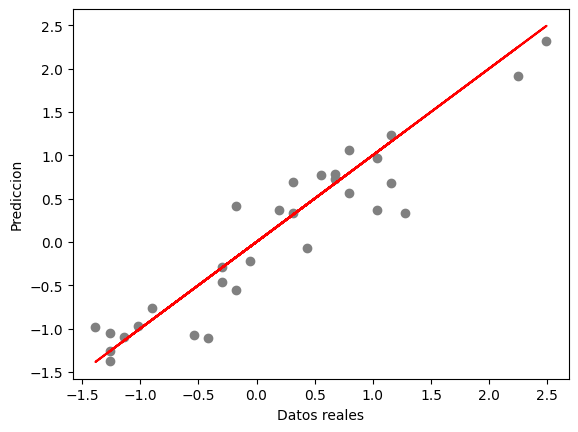

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(prueba['SepalLengthCm'],y_aprox,color='gray')
plt.plot(prueba['SepalLengthCm'],prueba['SepalLengthCm'],color='red')
plt.xlabel("Datos reales")
plt.ylabel("Prediccion")

In [ ]:
l_residuos=len(tabla['Errores'])

Text(0, 0.5, 'Valor del residuo')

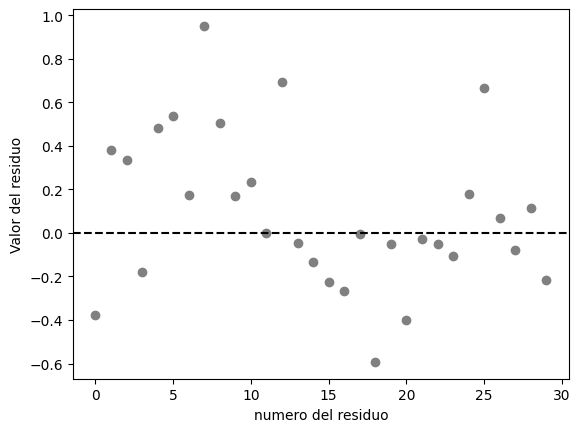

In [ ]:
plt.scatter(range(l_residuos),tabla['Errores'],color='gray')
plt.axhline(y=0,linestyle='--',color='black')
plt.xlabel("numero del residuo")
plt.ylabel("Valor del residuo")

Text(0, 0.5, 'Frecuencia (proba)')

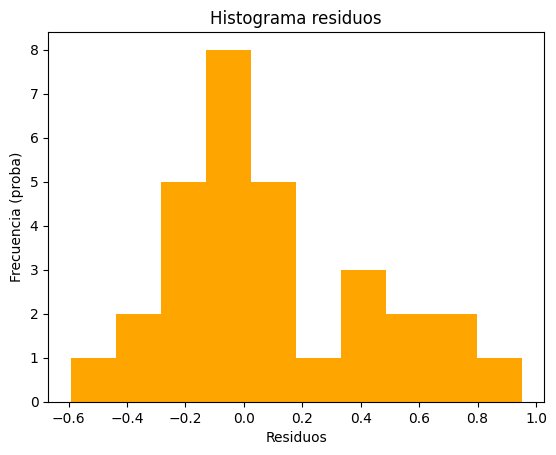

In [ ]:
plt.hist(x=tabla['Errores'],color='orange')
plt.title('Histograma residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia (proba)')

In [ ]:
media=tabla['Errores'].mean()
std=tabla['Errores'].std()
Errores_est=(tabla['Errores']-media)/std

In [ ]:
import statsmodels.api as sm
from scipy import stats
stats.kstest(Errores_est,'norm')

KstestResult(statistic=0.13371601636027958, pvalue=0.6095294211476956, statistic_location=-0.25433775542243403, statistic_sign=1)